In [1]:
import numpy as np
from scipy.fft import fft, ifft, fftshift
import matplotlib.pyplot as plt

In [2]:
L = 5.0
N = 100
dp = 2*L/N
plist = -L + np.arange(0,N)*dp
f = np.exp(-plist**2 + plist)
g = np.exp(-plist**4)

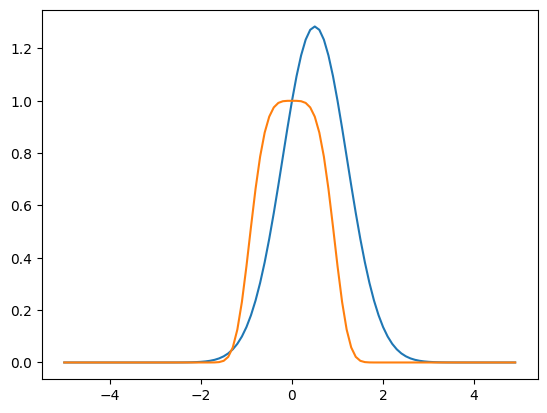

In [3]:
plt.plot(plist, f)
plt.plot(plist, g)
plt.show()

In [4]:
F = fft(f)
G = fft(g)

In [5]:
H = np.zeros(N, dtype=complex)
H[0] = F[0]*G[0]
for i in range(1, N):
    H[i] = F[i] * G[N-i]

In [6]:
h = ifft(H) * dp

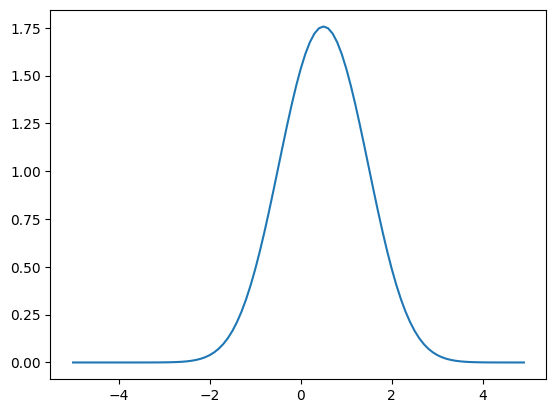

In [7]:
plt.plot(plist, fftshift(h.real))
plt.show()

In [8]:
ra = 1.2
rhb = 0.05
rgam = 0.0194
rgam1 = 6.85
rgam2 = 2.1
amee = 0.067
h2m02 = 3.80998
h2m2 = h2m02 / amee
aindb = 132.0
eryd = 4.2e-3

In [9]:
def fh(p):
    chie = h2m2*p*p
    chih = h2m02*p*p*(rgam1 - 2.0*rgam2)
    return np.exp(-(rhb - chie - chih)**2/2.0/rgam/rgam)

In [10]:
def fl(p):
    chie = h2m2*p*p
    chil = h2m02*p*p*(rgam1 + 2.0*rgam2)
    return np.exp(-(rhb - chie - chil)**2/2.0/rgam/rgam)

In [11]:
def f0(p, theta):
    return 1.0/6.0*ra*(3.0*fh(p)*(1-np.cos(theta)**2) + fl(p)*(1+3.0*np.cos(theta)**2))

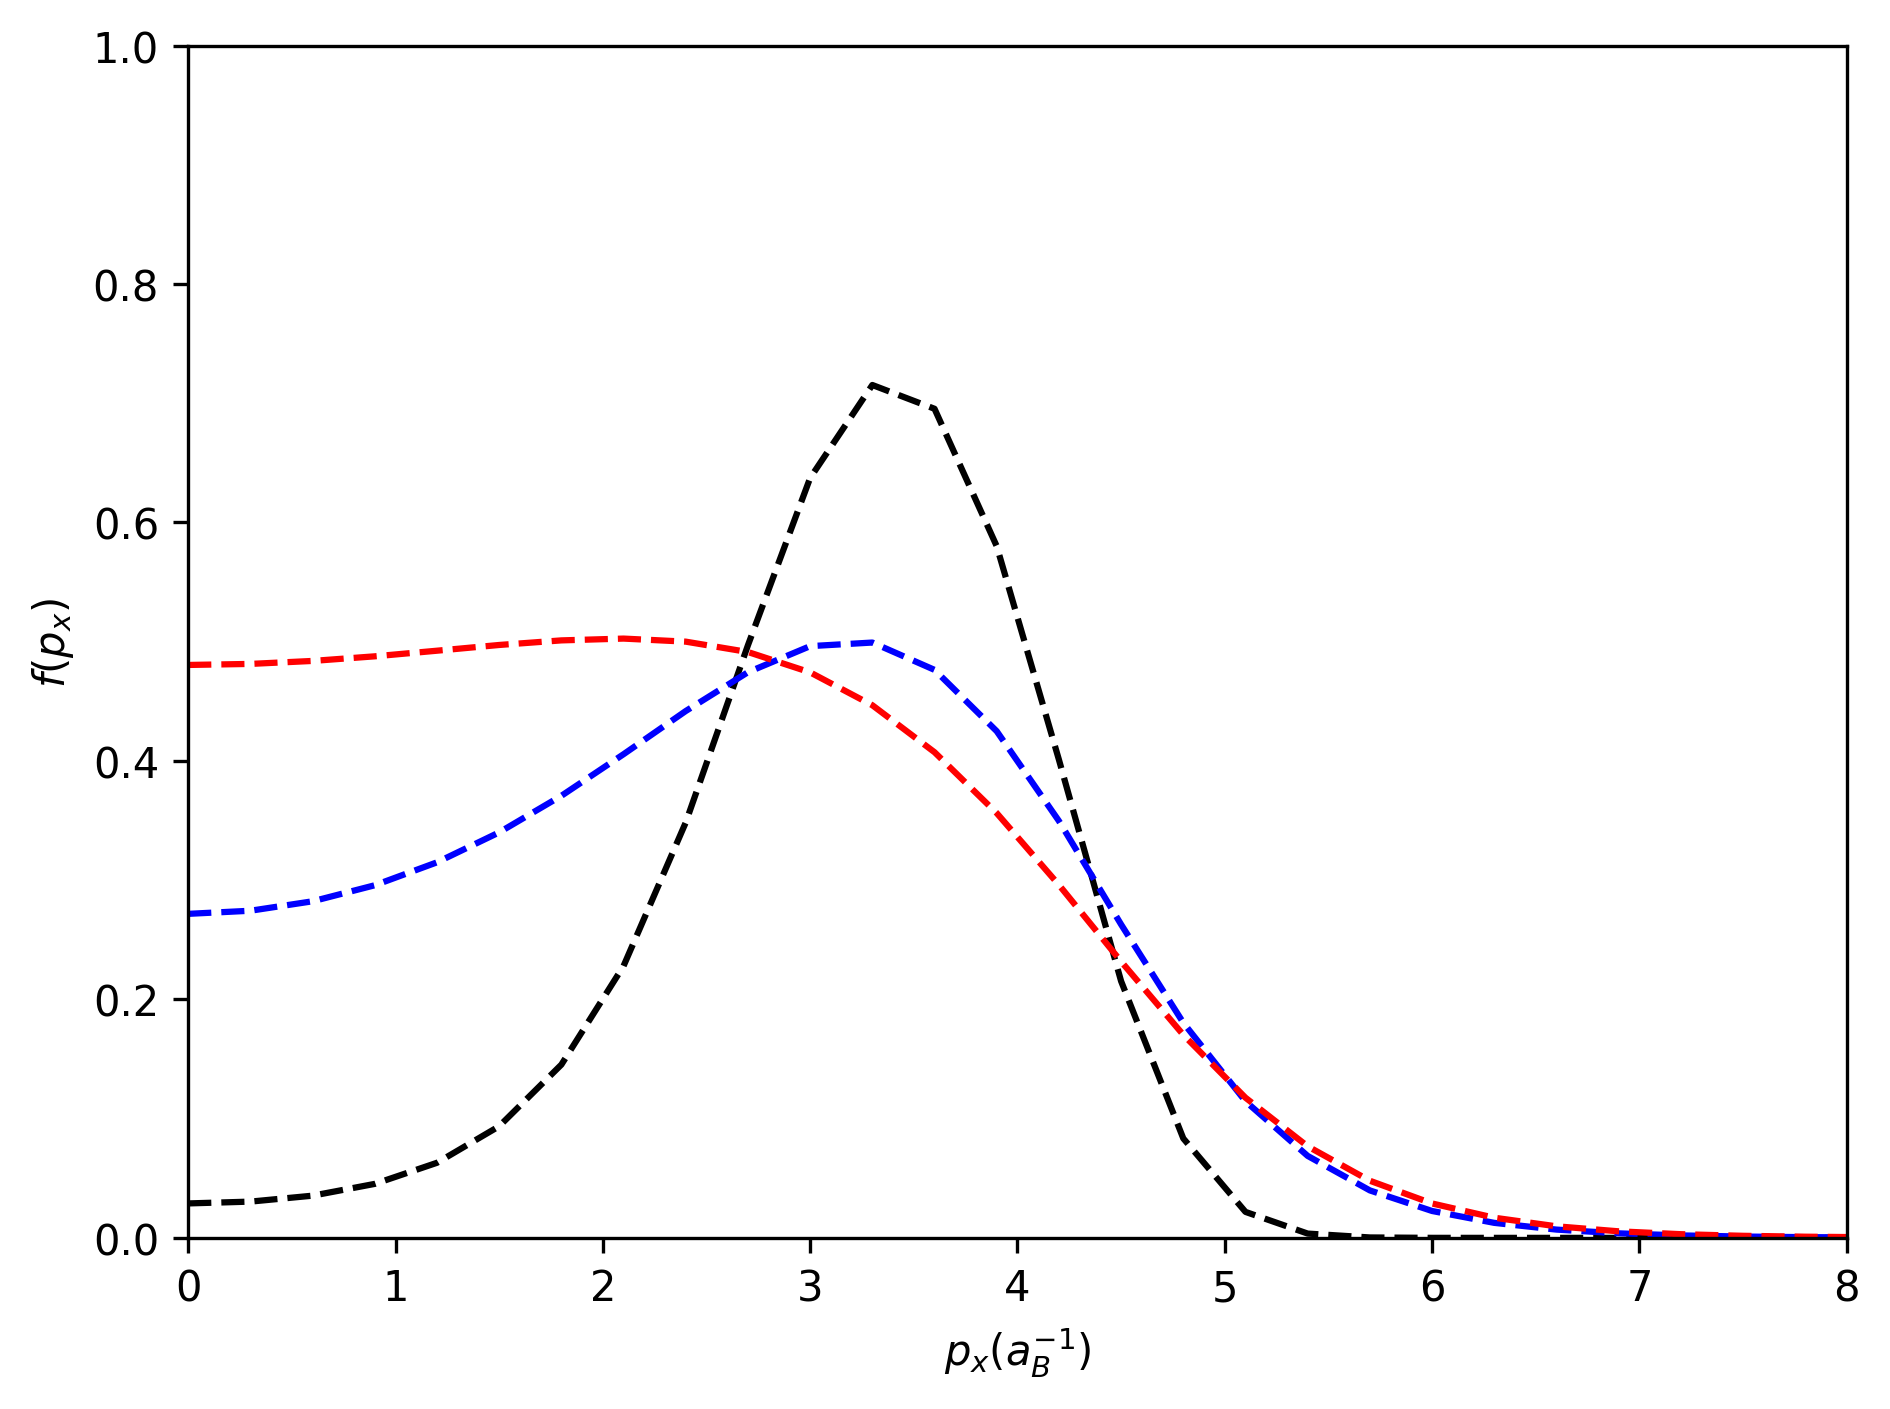

In [15]:
Npx = 28
dpx = 0.3/aindb
px = np.arange(0,Npx)*dpx
f0p = np.zeros(Npx)
for i in range(0, Npx):
    f0p[i] = f0(px[i], np.pi/2)

fx = np.loadtxt("px")[:28]
fx2 = np.loadtxt("px1")[:28]

plt.figure(dpi=300)
plt.plot(px*aindb, f0p, ls='--', color='black')
plt.plot(px*aindb, fx, ls='--', color='blue')
plt.plot(px*aindb, fx2, ls='--', color='red')
plt.xlim(0,8)
plt.ylim(0.0, 1.0)
plt.xlabel(u"$p_x(a_B^{-1})$")
plt.ylabel(u"$f(p_x)$")
plt.tight_layout()
plt.show()

In [32]:
hbar = 0.658212

In [35]:
hbar*hbar * 2.0 * np.log(2) / 40 /40

0.0003753764869437023

In [36]:
np.sqrt(hbar*hbar * 2.0 * np.log(2) / 40 /40)

0.01937463514349889